# Exploring Videogames Sales
## by Tomás Maguire

# Preliminary Wrangling

From Kaggle;

This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.


The script to scrape the data is available at https://github.com/GregorUT/vgchartzScrape. It is based on BeautifulSoup using Python. 

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Initial load and some summary statistic;

In [3]:
df = pd.read_csv('vgsales.csv')

In [63]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
df.shape

(16598, 11)

In [6]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


>There's null values on the dataset, so we're going to delete them. Also Years have a decimal value and we're going to fix that.

In [8]:
df = df.dropna(how="any")
df.Year = df.Year.astype(int)
df = df.query('Year <= 2016')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16287 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16287 non-null int64
Name            16287 non-null object
Platform        16287 non-null object
Year            16287 non-null int32
Genre           16287 non-null object
Publisher       16287 non-null object
NA_Sales        16287 non-null float64
EU_Sales        16287 non-null float64
JP_Sales        16287 non-null float64
Other_Sales     16287 non-null float64
Global_Sales    16287 non-null float64
dtypes: float64(5), int32(1), int64(1), object(4)
memory usage: 1.4+ MB


### Structure of data

There are 16291 values after dropping rows containing null values. 

Fields include;

Rank - Ranking of overall sales

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.)

Year - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales.

### Main features of intrest

We're going to investigate how different games genre are related to different countries, with focus on wich are more popular. Also we inquire about the evolution of the game industry across time.



# Univariate Exploration



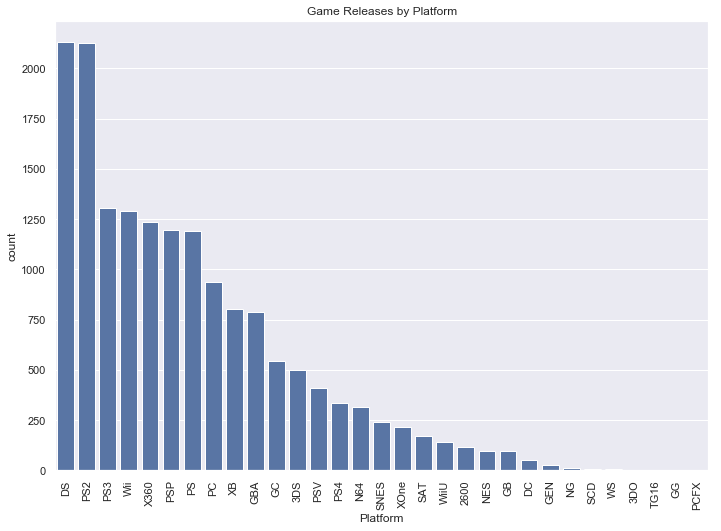

In [10]:
sb.set(rc={'figure.figsize':(11.7,8.27)})
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'Platform', color = base_color, order = df['Platform'].value_counts().index).set_title('Game Releases by Platform')
plt.xticks(rotation=90);


> Here we can see Nintendo DS and PS2 are leading the chart of game by platform (let's remember that dataset contains only game that sold more than 100.000 copies).

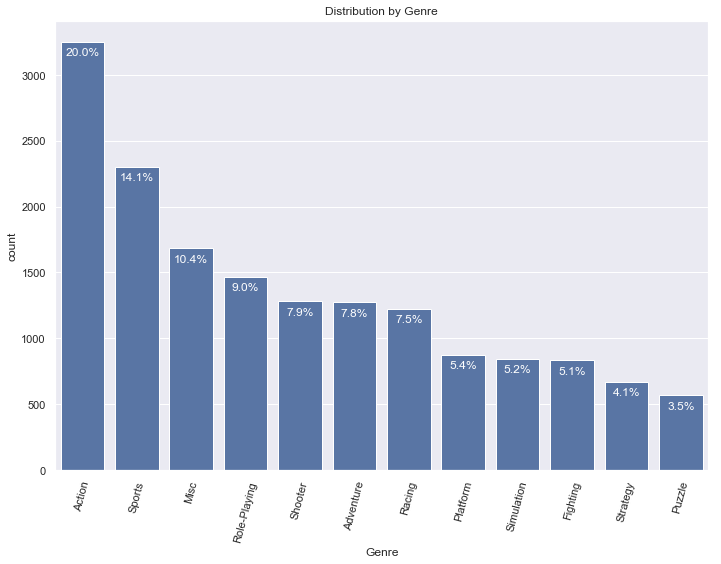

In [11]:
sb.set(rc={'figure.figsize':(11.7,8.27)})
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'Genre', color = base_color,order = df['Genre'].value_counts().index,).set_title('Distribution by Genre')
n_points = df.shape[0]
gen_count = df['Genre'].value_counts()
locs, labels = plt.xticks(rotation=75)
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = gen_count[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc,count-105, pct_string, ha = 'center', color = 'w');

> Here we see genres relative values. Actions and Sport lead the chart.

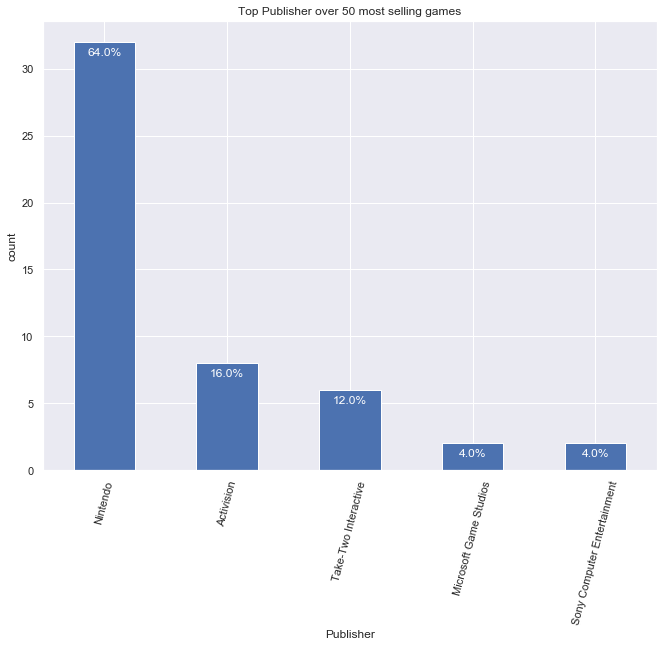

In [12]:
sb.set(rc={'figure.figsize':(11,8.27)})
dftop = df.query('Rank <= 50')
ax = dftop['Publisher'].value_counts().plot.bar(title='Top Publisher over 50 most selling games')
ax.set_ylabel('count')
ax.set_xlabel('Publisher')
n_points = dftop.shape[0]
pub_count = dftop['Publisher'].value_counts()
locs, labels = plt.xticks(rotation=75)
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = pub_count[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc,count-1, pct_string, ha = 'center', color = 'w');

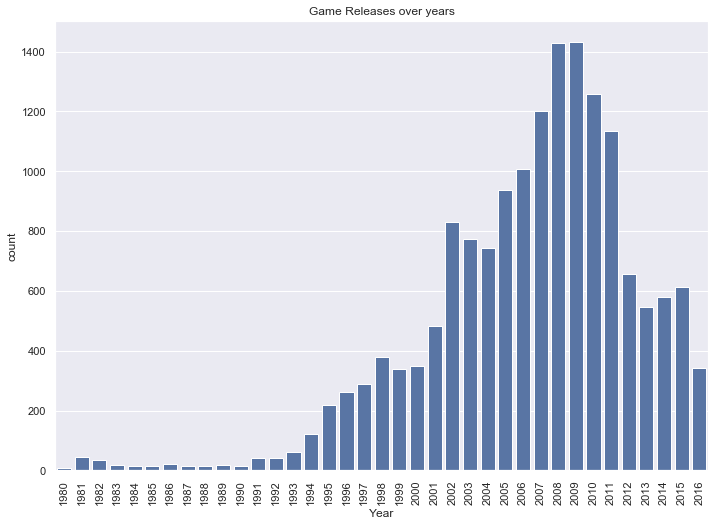

In [13]:
sb.set(rc={'figure.figsize':(11.7,8.27)})
base_color = sb.color_palette()[0]
g = sb.countplot(data = df, x = 'Year', color = base_color).set_title('Game Releases over years')
plt.xticks(rotation=90);





> Some transformation needs to be done in the revenue columns, the amplitude of the data and its configuration makes difficult to get a clear understanding about game sales. Some minimal data wrangling was done, filtering years from 1980 to 2016, converting Years to remove decimals and deleting few useless rows.



# Bivariate Exploration

> Here we're going to inquire about sales. 

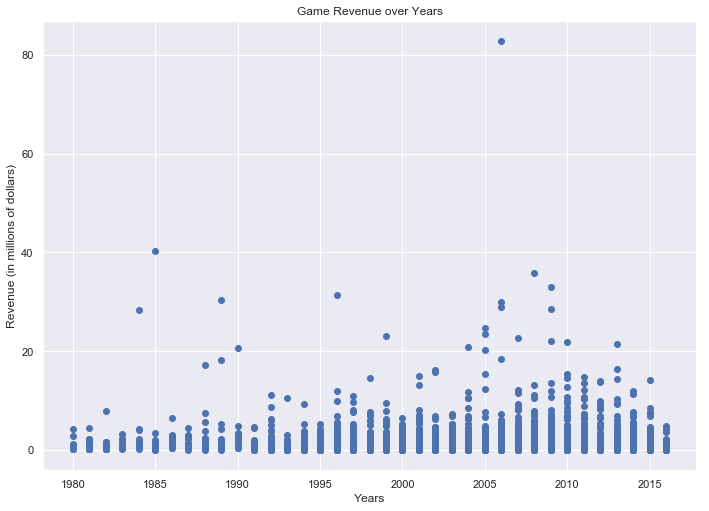

In [14]:
plt.scatter(data = df, x = 'Year', y = 'Global_Sales')
plt.title("Game Revenue over Years")
plt.xlabel("Years")
plt.ylabel("Revenue (in millions of dollars)")
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

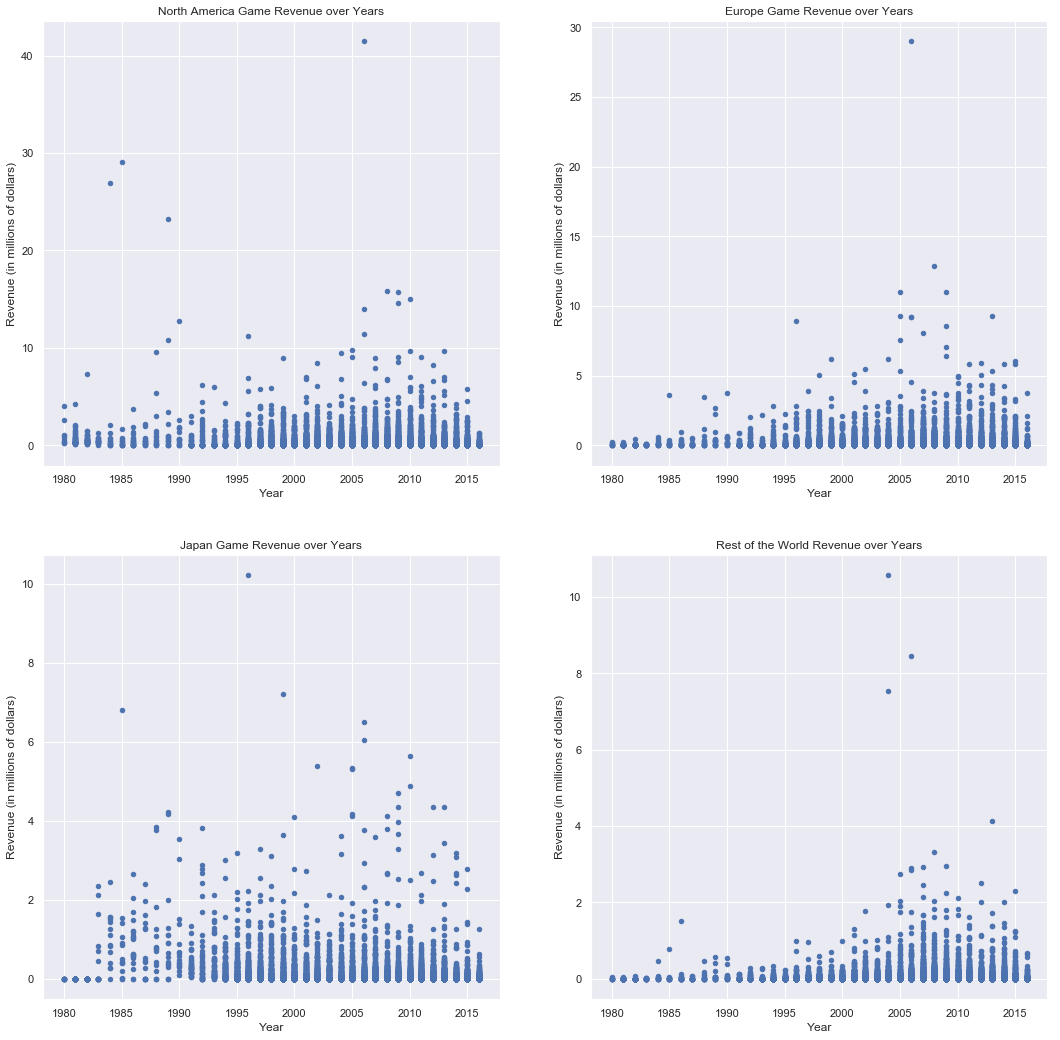

In [15]:
fig = plt.figure(2,figsize=(18, 18))

ax1 = fig.add_subplot(2, 2, 1)
plt.title("North America Game Revenue over Years")
df.plot.scatter(x = "Year", y = "NA_Sales", ax=ax1)
plt.ylabel("Revenue (in millions of dollars)")

ax2 = fig.add_subplot(2, 2, 2)
plt.title("Europe Game Revenue over Years")
df.plot.scatter(x = "Year", y = "EU_Sales", ax=ax2)
plt.ylabel("Revenue (in millions of dollars)")

ax3 = fig.add_subplot(2, 2, 3)
plt.title("Japan Game Revenue over Years")
df.plot.scatter(x = "Year", y = "JP_Sales", ax=ax3)
plt.ylabel("Revenue (in millions of dollars)")

ax4 = fig.add_subplot(2, 2, 4)
plt.title("Rest of the World Revenue over Years")
df.plot.scatter(x = "Year", y = "Other_Sales", ax=ax4)
plt.ylabel("Revenue (in millions of dollars)");

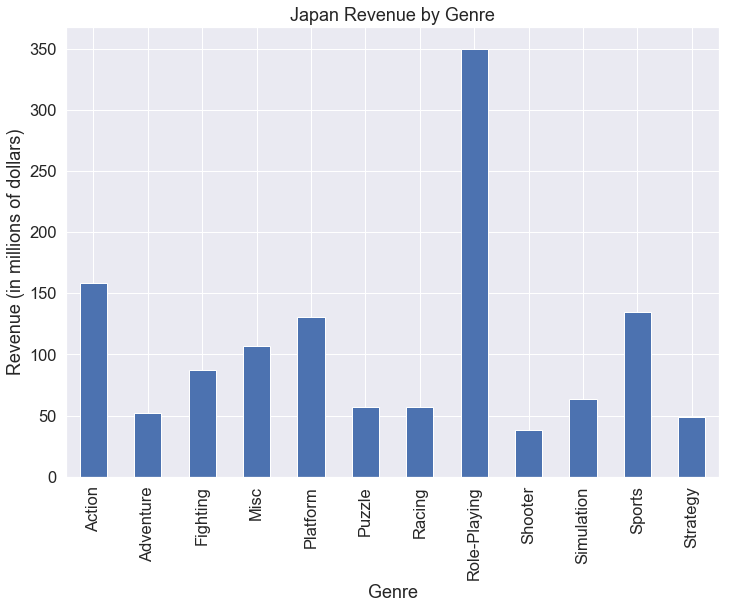

In [64]:
### MELTED DATAFRAME FOR FURTHER INVESTIGATION ##########

dfmelted = pd.melt(df, id_vars = ['Name','Genre','Year','Platform'], value_vars = ['JP_Sales','NA_Sales','EU_Sales','Other_Sales'])

#########################################################

dfjapan = dfmelted.query('variable == "JP_Sales"')
dfjapan.groupby('Genre')['value'].sum().plot.bar()
plt.title("Japan Revenue by Genre")
plt.xlabel("Genre")
plt.ylabel("Revenue (in millions of dollars)")
plt.show()

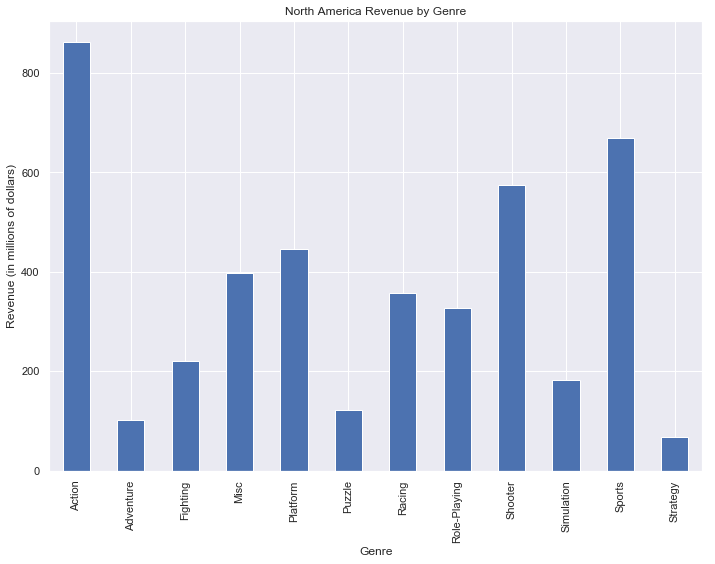

In [17]:

dfna = dfmelted.query('variable == "NA_Sales"')
dfna.groupby('Genre')['value'].sum().plot.bar()
plt.title("North America Revenue by Genre")
plt.xlabel("Genre")
plt.ylabel("Revenue (in millions of dollars)")
plt.show()

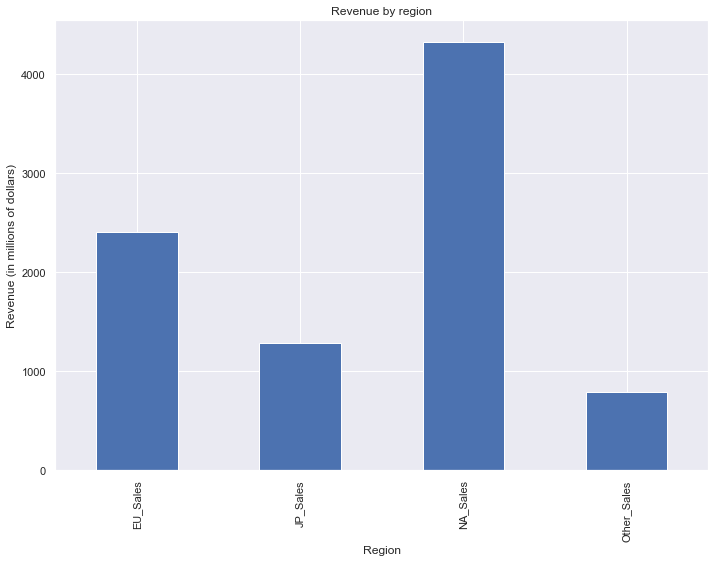

In [18]:
dfmelted.groupby('variable')['value'].sum().plot.bar()
plt.title("Revenue by region")
plt.xlabel("Region")
plt.ylabel("Revenue (in millions of dollars)")
plt.show()

### Observations

> Here we've done some data wrangling to inquire about sales. We were able to see difference between markets, with North America being the most important market, followed by Europe and Japan. Scatter Plot showed an intresting fact, Japan videogame culture is way earlier than the other regions. Also when divided by region, culture differences shows up when we take a look to most selling genres. Japan prefer Role-Playing while North America sticks with Action, Sports or Shooters.



# Multivariate Exploration

> NOTE; Help from Kaggle Kernells was used and based to create following multivariate graphs.

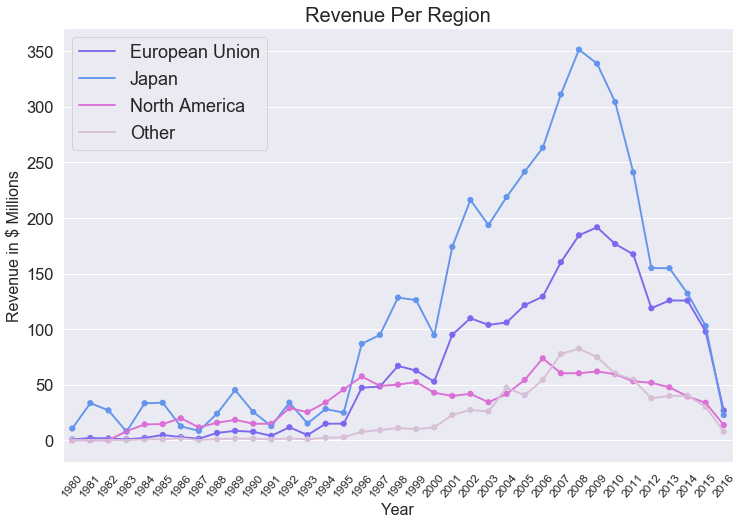

In [114]:
EU = df.pivot_table('EU_Sales', columns='Name', index='Year', aggfunc='sum').sum(axis=1)
NA = df.pivot_table('NA_Sales', columns='Name', index='Year', aggfunc='sum').sum(axis=1)
JP = df.pivot_table('JP_Sales', columns='Name', index='Year', aggfunc='sum').sum(axis=1)
Other = df.pivot_table('Other_Sales', columns='Name', index='Year', aggfunc='sum').sum(axis=1)
years = Other.index.astype(int)
regions = ['European Union','Japan','North America','Other']

plt.figure(figsize=(12,8))
ax = sb.pointplot(x=years, y=EU, color='mediumslateblue', scale=0.7)
ax = sb.pointplot(x=years, y=NA, color='cornflowerblue', scale=0.7)
ax = sb.pointplot(x=years, y=JP, color='orchid', scale=0.7)
ax = sb.pointplot(x=years, y=Other, color='thistle', scale=0.7)
ax.set_xticklabels(labels=years, fontsize=12, rotation=50)
ax.set_xlabel(xlabel='Year', fontsize=16)
ax.set_ylabel(ylabel='Revenue in $ Millions', fontsize=16)
ax.set_title(label='Revenue Per Region', fontsize=20)
ax.legend(handles=ax.lines[::len(years)+1], labels=regions, fontsize=18)
plt.show();

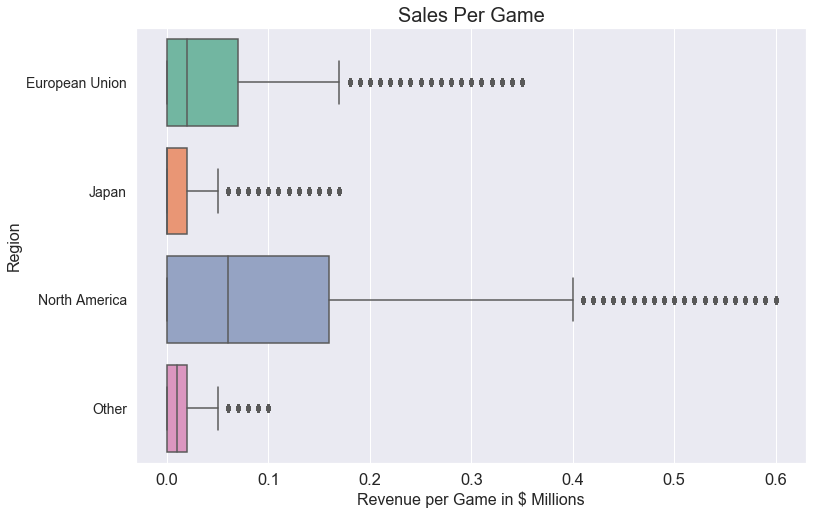

In [115]:
data = df
data = pd.DataFrame([data['EU_Sales'], data['JP_Sales'], data['NA_Sales'], data['Other_Sales']]).T
regions = ['European Union', 'Japan', 'North America', 'Other']
q = data.quantile(0.90)
data = data[data < q]
plt.figure(figsize=(12,8))

colors = sb.color_palette("Set2", len(data))
ax = sb.boxplot(data=data, orient='h', palette=colors)
ax.set_xlabel(xlabel='Revenue per Game in $ Millions', fontsize=16)
ax.set_ylabel(ylabel='Region', fontsize=16)
ax.set_title(label='Sales Per Game', fontsize=20)
ax.set_yticklabels(labels=regions, fontsize=14)
plt.show()

> Here we can observe sales and market disparity related to regions. Despite we could inquire about more variables, our focus here was to measure and visualize how global zones differ from one another in economics terms.